In [1]:
# see old_Lagrangian_project/test_plots.py for original code
from lagrangian_case import TrajectoryCase, AircraftCase
import matplotlib.pyplot as plt
from matplotlib import gridspec, rc
import os

import xarray as xr
import met_utils
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
import pickle
import utils
# font = {'family' : 'DejaVu Sans',
#         'weight' : 'bold',
#         'size'   : 16}
# rc('font', **font)


# %matplotlib ipympl
%load_ext autoreload
%autoreload 2

In [2]:
with open('lagcorrs.pickle', 'rb') as f:
        data = pickle.load(f)
        
CTH_EIS_lagcorrs = data['CTH_EIS_lagcorrs']
CTH_ND_lagcorrs = data['CTH_ND_lagcorrs']
CF_EIS_lagcorrs = data['CF_EIS_lagcorrs']
CF_ND_lagcorrs = data['CF_ND_lagcorrs']
lag = data['lag']

In [3]:
data.keys()

dict_keys(['lag', 'CTH_ND_lagcorrs', 'CF_ND_lagcorrs', 'CTH_EIS_lagcorrs', 'CF_EIS_lagcorrs'])

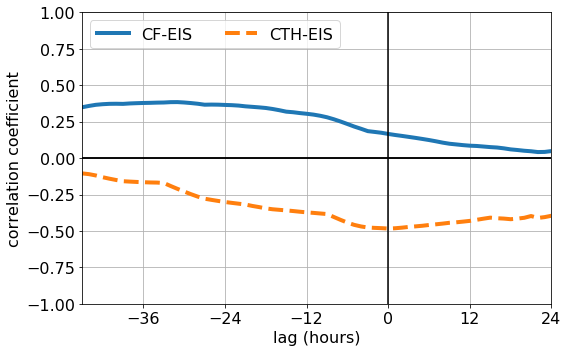

In [11]:
fig, ax = plt.subplots(figsize=(8,5))

ax1 = ax
ax2 = ax

# ax1.plot(lag, CF_ND_lagcorrs, label='CF-Nd', lw=4)
ax1.plot(lag, CF_EIS_lagcorrs, label='CF-EIS', lw=4)
# ax1.set_title('CF lag correlations')
ax1.set_ylabel('correlation coefficient')
ax1.grid(True)
ax1.set_xticks([-36, -24, -12, 0, 12, 24])
ax1.set_xlim([min(lag), max(lag)])
# ax1.legend()
ax1.set_xlabel('lag')
ax1.set_ylim(bottom=-1, top=1)
ax1.axhline(0, c='k')

# ax2.plot(lag, CTH_ND_lagcorrs, label='CTH-Nd', ls='--', lw=4)
ax2.plot(lag, CTH_EIS_lagcorrs, label='CTH-EIS', ls='--', lw=4)
# ax2.set_title('CTH lag correlations')
ax2.grid(True)
ax2.set_xticks([-36, -24, -12, 0, 12, 24])
ax2.set_xlim([min(lag), max(lag)])
ax2.legend(ncol=2)
ax2.set_xlabel('lag (hours)')
ax2.set_ylim(bottom=-1, top=1)
ax2.axhline(0, c='k')

ax2.axvline(0, c='k', ls='-')

fig.tight_layout()
fig.savefig(os.path.join(utils.plot_dir, '6_lagcorrs_anom.png'), dpi=300)
